Bisection intervals tol =0.005(absolute)
[1.0, 2.0 -> p = 1.5]
[1.0, 1.5 -> p = 1.25]
[1.25, 1.5 -> p = 1.375]
[1.25, 1.375 -> p = 1.3125]
[1.3125, 1.375 -> p = 1.34375]
[1.34375, 1.375 -> p = 1.359375]
[1.359375, 1.375 -> p = 1.3671875]
[1.359375, 1.3671875 -> p = 1.36328125]
[1.36328125, 1.3671875 -> p = 1.365234375]

Estimated root: 1.365234375


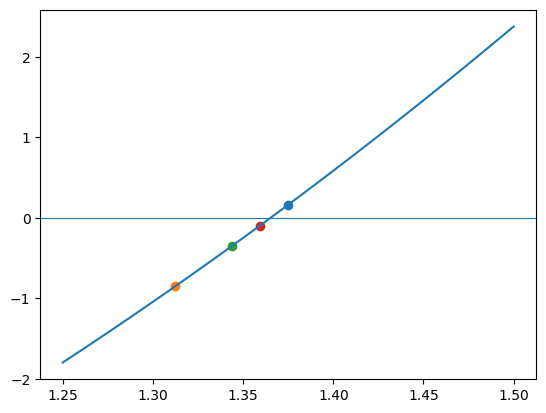

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.printing.pretty.pretty_symbology import line_width


def bisection(f, a, b, tol=1e-3, max_iter=100, stopping_criterion='absolute'):
    """
    Perform the bisection method on f over [a, b].

    Parameters:
        f: function
        a, b: interval endpoints
        tol: tolerance for stopping
        max_iter: maximum number of iterations
        stopping_criterion: 'absolute' or 'relative'

    Returns:
        root: estimated root
        seq: list of (a, b, midpoint) at each iteration
    """
    seq = []
    for _ in range(max_iter):
        p = (a + b) / 2
        seq.append((a, b, p))

        fa, fp = f(a), f(p)
        if stopping_criterion == 'absolute':
            if abs(b - a) < tol:
                break
        else:  # relative
            if abs((b - a) / p) < tol:
                break

        if fa * fp <= 0:
            b = p
        else:
            a = p
    return p, seq

# Define the function
f = lambda x: x**3 + 4*x**2 - 10

# Absolute tolerance example: [1, 2], tol=0.005
root_abs, seq_abs = bisection(f, 1.0, 2.0, tol=0.005, stopping_criterion='absolute')

print('Bisection intervals tol =0.005(absolute)')
for interval in seq_abs:
    print(f"[{interval[0]}, {interval[1]} -> p = {interval[2]}]")
print(f"\nEstimated root: {root_abs:.9f}")

root_rel, seq_rel = bisection(f, 1.0, 2.0, 0.005, stopping_criterion='relative')


a, b = 1.25, 1.5
_, seq_plot = bisection(f, a, b, tol = 0.02, max_iter = 4)
midpoints = [p for (_, _, p) in seq_plot]

x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)


plt.figure()
plt.plot(x_vals, y_vals)
plt.axhline(0, linewidth= 0.8)
for p in midpoints:
    plt.scatter(p, f(p))


In [25]:
def f(x):
    return 4 * (x+1)*(x -1/2)*(x-1)
a0, b0 = -2, 1.5
fa0, fb0 = f(a0), f(b0)
p = (a0 + b0) / 2
fp = f(p)
fp * fa0

-84.375

In [26]:
def f(x):
    return x - 2**-x

In [31]:
bisection(f, 1, 2, tol = 1e-5)

(1.2397117614746094,
 [(1, 2, 1.5),
  (1, 1.5, 1.25),
  (1, 1.25, 1.125),
  (1.125, 1.25, 1.1875),
  (1.1875, 1.25, 1.21875),
  (1.21875, 1.25, 1.234375),
  (1.234375, 1.25, 1.2421875),
  (1.234375, 1.2421875, 1.23828125),
  (1.23828125, 1.2421875, 1.240234375),
  (1.23828125, 1.240234375, 1.2392578125),
  (1.2392578125, 1.240234375, 1.23974609375),
  (1.2392578125, 1.23974609375, 1.239501953125),
  (1.239501953125, 1.23974609375, 1.2396240234375),
  (1.2396240234375, 1.23974609375, 1.23968505859375),
  (1.23968505859375, 1.23974609375, 1.239715576171875),
  (1.23968505859375, 1.239715576171875, 1.2397003173828125),
  (1.2397003173828125, 1.239715576171875, 1.2397079467773438),
  (1.2397079467773438, 1.239715576171875, 1.2397117614746094)])

In [30]:
a, b = 0, 1
def f(x):
    return 2*x + 3 * np.cos(x) - np.exp(x)
bisection(f, a, b, tol = 1e-5)

(0.9999961853027344,
 [(0, 1, 0.5),
  (0.5, 1, 0.75),
  (0.75, 1, 0.875),
  (0.875, 1, 0.9375),
  (0.9375, 1, 0.96875),
  (0.96875, 1, 0.984375),
  (0.984375, 1, 0.9921875),
  (0.9921875, 1, 0.99609375),
  (0.99609375, 1, 0.998046875),
  (0.998046875, 1, 0.9990234375),
  (0.9990234375, 1, 0.99951171875),
  (0.99951171875, 1, 0.999755859375),
  (0.999755859375, 1, 0.9998779296875),
  (0.9998779296875, 1, 0.99993896484375),
  (0.99993896484375, 1, 0.999969482421875),
  (0.999969482421875, 1, 0.9999847412109375),
  (0.9999847412109375, 1, 0.9999923706054688),
  (0.9999923706054688, 1, 0.9999961853027344)])

In [37]:
def f(x):
    return (x + 2) * (x + 1)**2 * x * (x - 1)**3 * (x - 2)

tup = ([-1.5, 2.5], [-5, 2.4], [-0.5, 3], [-3, -0.5])

for interval in tup:
    fa = f(interval[0])
    fb = f(interval[1])
    converge = fa * fb <= 0
    print(converge)


True
False
True
True


In [62]:
V = 12.4
L = 10
def f(h):
    return -V + L*(0.5*np.pi - np.arcsin(h) - h**2*(1 - h**2)**0.5)
bisection(f, 0, 1, 1e-6, )

0.2616431283950805

In [70]:
from scipy.integrate import solve_ivp

x = 1.7
g = 32.17
t = 1
def f(om):
    return g/(2*om**2)*(np.sinh(om) - np.sin(om))

om = bisection(f, -100, -0.1, 10e-5)
om

-0.10009527206420898

In [52]:
bisection(f, 0.0000001, 100, 10e-5)

(0.7961751022555827,
 [(1e-07, 100, 50.00000005),
  (1e-07, 50.00000005, 25.000000075),
  (1e-07, 25.000000075, 12.5000000875),
  (1e-07, 12.5000000875, 6.25000009375),
  (1e-07, 6.25000009375, 3.125000096875),
  (1e-07, 3.125000096875, 1.5625000984375),
  (1e-07, 1.5625000984375, 0.78125009921875),
  (0.78125009921875, 1.5625000984375, 1.171875098828125),
  (0.78125009921875, 1.171875098828125, 0.9765625990234374),
  (0.78125009921875, 0.9765625990234374, 0.8789063491210938),
  (0.78125009921875, 0.8789063491210938, 0.8300782241699218),
  (0.78125009921875, 0.8300782241699218, 0.8056641616943359),
  (0.78125009921875, 0.8056641616943359, 0.793457130456543),
  (0.793457130456543, 0.8056641616943359, 0.7995606460754394),
  (0.793457130456543, 0.7995606460754394, 0.7965088882659912),
  (0.793457130456543, 0.7965088882659912, 0.7949830093612671),
  (0.7949830093612671, 0.7965088882659912, 0.7957459488136291),
  (0.7957459488136291, 0.7965088882659912, 0.7961274185398102),
  (0.79612741853